# Sales Data Analysis

In [1]:
#Loading the libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

Consider a data set (Train.csv and Test.csv) related to sales of items in shops

In [2]:
#Importing the Data

test_data = pd.read_csv("Test.csv")
train_data = pd.read_csv("Train.csv")

In [3]:
#Displaying first 3 records of the test dataset
test_data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [4]:
test_data.shape

(5681, 11)

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [6]:
#Displaying first 3 records of the train dataset
train_data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [7]:
train_data.shape

(8523, 12)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


'Item_Visibility' contains value '0', which is not ideal in real world. I will fix this during data cleaning.

In [10]:
train_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Distribution of 'Item_Identifier'

In [11]:
x = train_data.groupby('Item_Identifier',as_index=False)['Item_Weight'].count()
x[x['Item_Weight']<1]

,Item_Identifier,Item_Weight
351,FDE52,0
577,FDK57,0
686,FDN52,0
819,FDQ60,0


In [12]:
train_data[train_data['Item_Identifier'].isin(x[x['Item_Weight']<1]['Item_Identifier'])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


These 4 Item_Identifiers have Item_Weight 'NULL' and are not sold more than once. Hence we can remove this data.

Item_Identifier column has special codes to recognize the type of item when I tried to understand data. I observed first three letters and two letters to control which of them is more meaningful. I decided to use first two letters.
- DR = Drink
- FD = Food
- NC = Non-Consumable

#### Distribution of 'Item_Fat_Content'

Text(0.5, 1.0, "Distribution of 'Item_Fat_Content'")

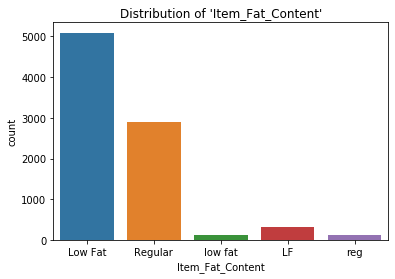

In [13]:
sns.countplot(train_data['Item_Fat_Content'])
plt.title("Distribution of 'Item_Fat_Content'")

#### There are two possible choices - 'Low Fat', 'Regular'.<br>
But in our data we have two types of Fat (low fat and FL) writen in different manners and also one type of regular (reg) written in different manner.<br>
This will be corrected during data cleaning.

#### Distribution of 'Item_Weight'

Text(0.5, 1.0, "Distribution of 'Item_Weight'")

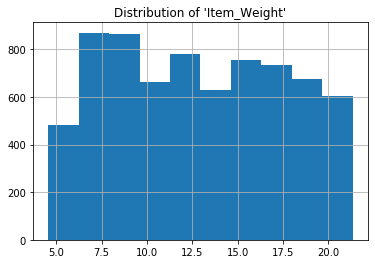

In [14]:
train_data.Item_Weight.hist()
plt.title("Distribution of 'Item_Weight'")

#### Distribution of 'Item_Visibility'

Text(0.5, 1.0, "Distribution of 'Item_Visibility'")

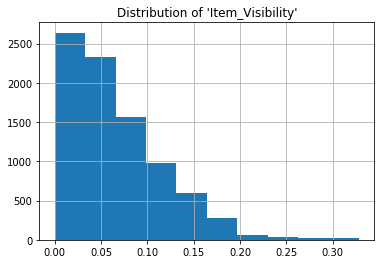

In [15]:
train_data.Item_Visibility.nunique()
train_data.Item_Visibility.hist()
plt.title("Distribution of 'Item_Visibility'")

Many Items have visibility '0'. This is not possible is the real world. 

#### Distribution of 'Item_Type'

Text(0.5, 1.0, 'Distribution of Item_Type')

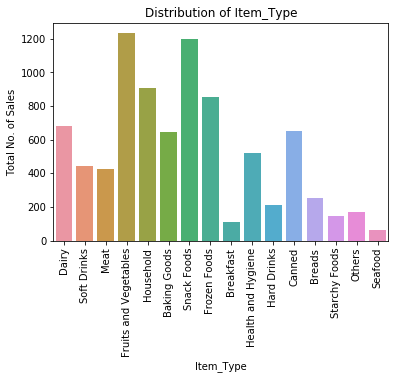

In [16]:
sns.countplot(train_data['Item_Type'])
plt.ylabel("Total No. of Sales")
plt.xticks(rotation=90)
plt.title("Distribution of Item_Type")

There are sixteen different types. We Can reduce this by grouping according to Item_Identifier attribute.

#### Distribution of 'Item_MRP'

Text(0.5, 1.0, 'Distribution of Item_MRP')

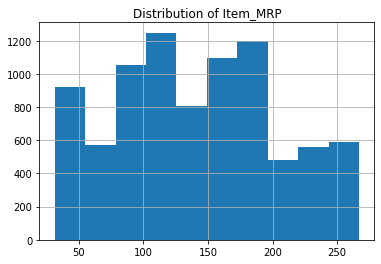

In [17]:
train_data.Item_MRP.hist()
plt.title("Distribution of Item_MRP")

#### Distribution of 'Outlet_Identifier'

Text(0.5, 1.0, 'Distribution of Outlet_Identifier')

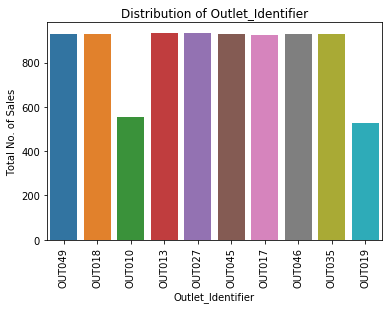

In [18]:
sns.countplot(train_data['Outlet_Identifier'])
plt.ylabel("Total No. of Sales")
plt.xticks(rotation=90)
plt.title("Distribution of Outlet_Identifier")

#### Distribution of 'Outlet_Establishment_Year'

Text(0.5, 1.0, 'Distribution of Outlet_Establishment_Year')

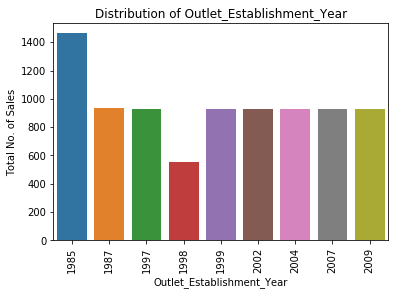

In [19]:
sns.countplot(train_data['Outlet_Establishment_Year'])
plt.ylabel("Total No. of Sales")
plt.xticks(rotation=90)
plt.title("Distribution of Outlet_Establishment_Year")

#### Distribution of 'Outlet_Size'

Text(0.5, 1.0, 'Distribution of Outlet_Size')

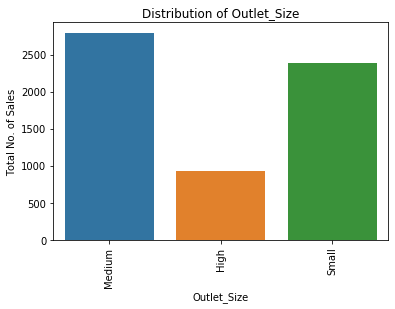

In [20]:
sns.countplot(train_data['Outlet_Size'])
plt.ylabel("Total No. of Sales")
plt.xticks(rotation=90)
plt.title("Distribution of Outlet_Size")

#### Distribution of 'Outlet_Location_Type'

Text(0.5, 1.0, 'Distribution of Outlet_Location_Type')

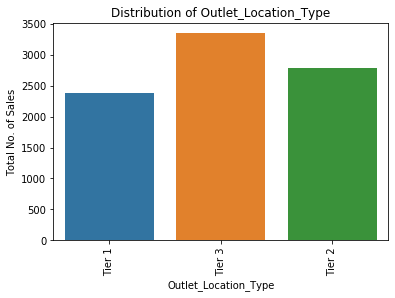

In [21]:
sns.countplot(train_data['Outlet_Location_Type'])
plt.ylabel("Total No. of Sales")
plt.xticks(rotation=90)
plt.title("Distribution of Outlet_Location_Type")

#### Distribution of 'Outlet_Type'

Text(0.5, 1.0, 'Distribution of Outlet_Type')

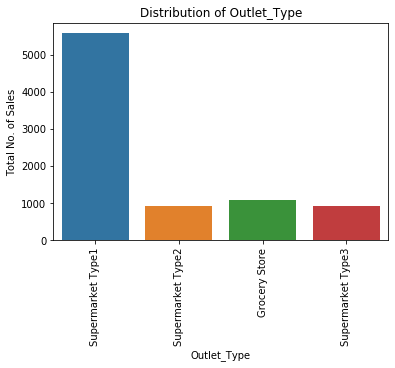

In [22]:
sns.countplot(train_data['Outlet_Type'])
plt.ylabel("Total No. of Sales")
plt.xticks(rotation=90)
plt.title("Distribution of Outlet_Type")

In [23]:
numeric_var_names=[key for key in dict(train_data.dtypes) if dict(train_data.dtypes)[key] in ['float64', 'int64']]
cat_var_names=[key for key in dict(train_data.dtypes) if dict(train_data.dtypes)[key] in ['object']]

### Bivariate Analysis

#### Correlation analysis

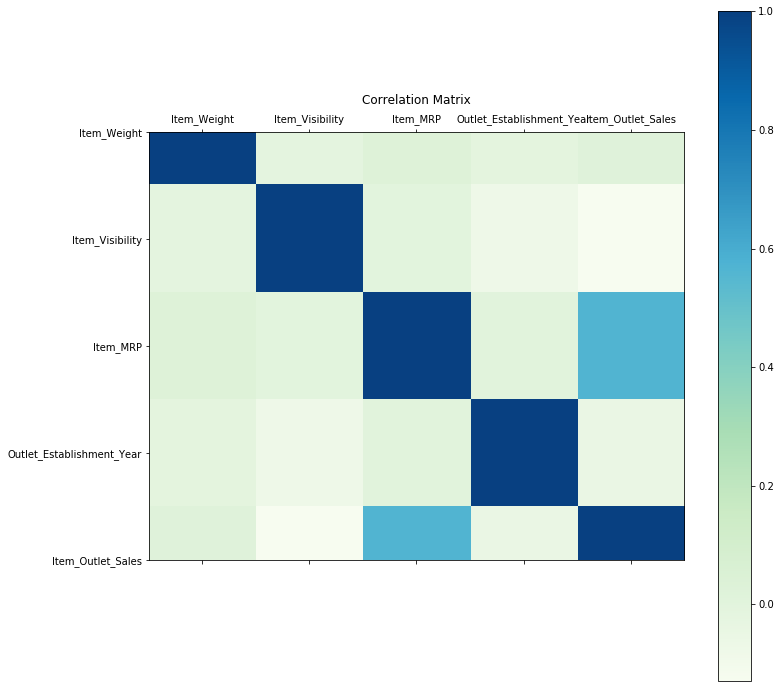

In [24]:
plt.rcParams['figure.figsize'] = [10,12]
matrix = train_data.corr()
plt.matshow(matrix,cmap='GnBu')
plt.xticks(range(len(matrix.columns)),matrix.columns)
plt.yticks(range(len(matrix.columns)),matrix.columns)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

#### My Conclusion after the above analysis are :
- Item_weight have low correlation with Item_Outlet_Sales
- Item_Visibility has the lowest correlation with Item_Outlet_Sales
- Item_MRP has positive correlation with Item_Outlet_Sales

### Item_Weight and Item_Outlet_Sales analysis

Text(0.5, 1.0, 'Item_Weight and Item_Outlet_Sales Analysis')

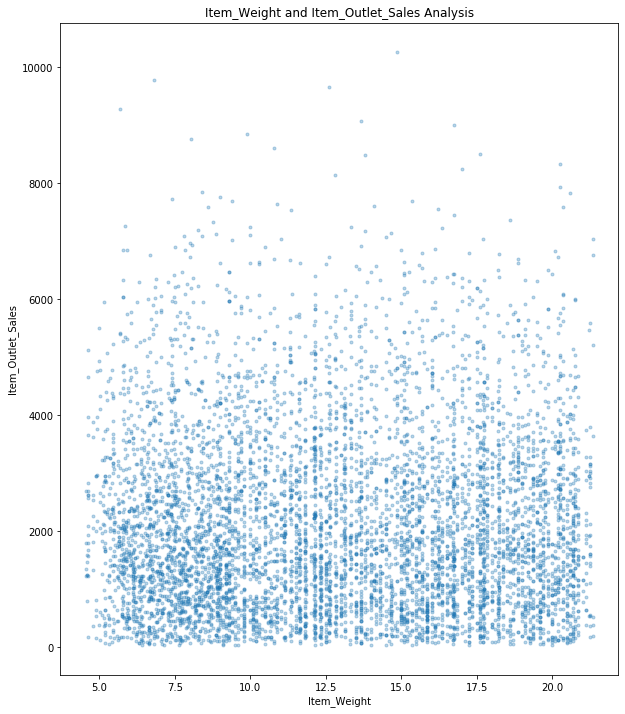

In [25]:
plt.plot(train_data.Item_Weight, train_data["Item_Outlet_Sales"],'.', alpha = 0.3)
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")

### Item_Visibility and Item_Outlet_Sales analysis

Text(0.5, 1.0, 'Item_Visibility and Item_Outlet_Sales Analysis')

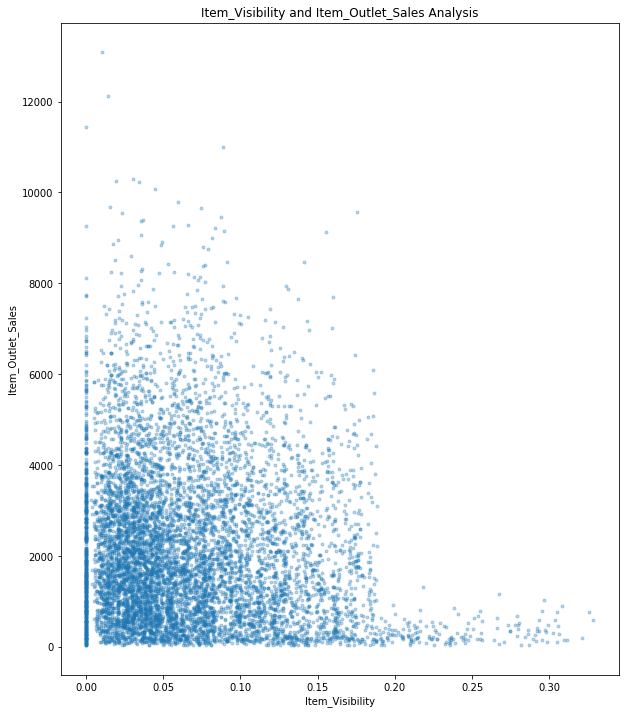

In [26]:
plt.plot(train_data.Item_Visibility, train_data['Item_Outlet_Sales'],'.', alpha = 0.3)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Visibility and Item_Outlet_Sales Analysis')

The more visible a product is the less higher its sales will be. Most sold products have lower visibility

### Outlet_Establishment_Year and Item_Outlet_Sales analysis

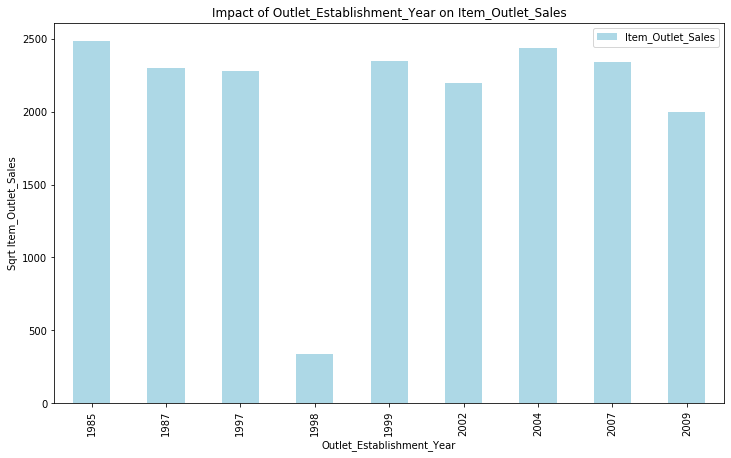

In [27]:
Outlet_Establishment_Year_pivot = train_data.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales")
Outlet_Establishment_Year_pivot.plot(kind='bar', color='lightblue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

### Impact of Item_Fat_Content onItem_Outlet_Sales

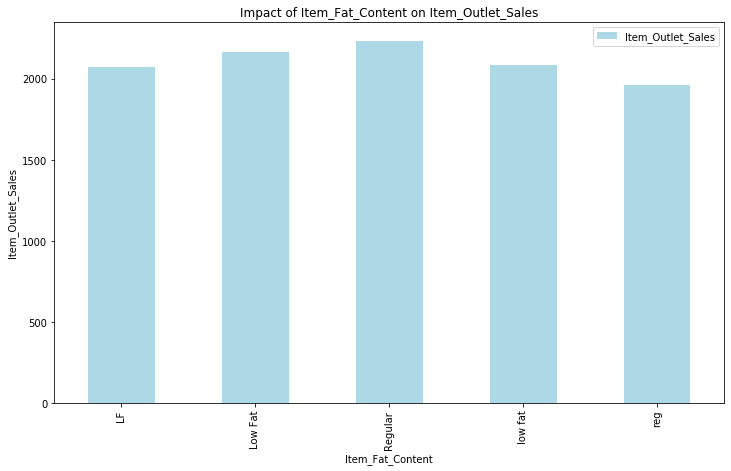

In [28]:
Item_Fat_Content_pivot = train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales")
Item_Fat_Content_pivot.plot(kind='bar', color='lightblue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

### Impact of Outlet_Identifier on Item_Outlet_Sales

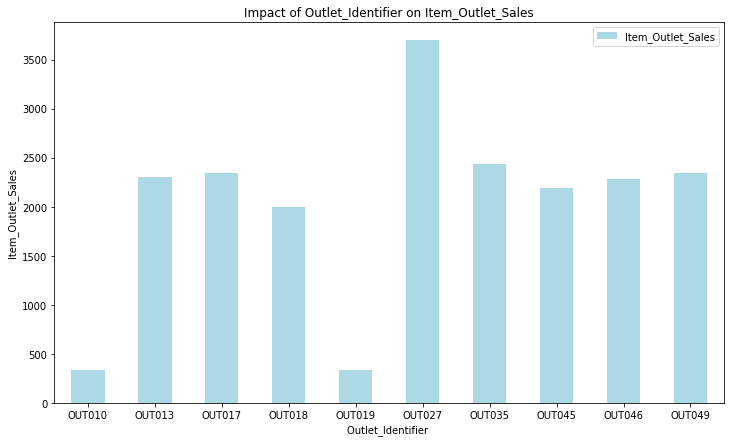

In [29]:
Outlet_Identifier_pivot = train_data.pivot_table(index='Outlet_Identifier', values='Item_Outlet_Sales')
Outlet_Identifier_pivot.plot(kind='bar', color='lightblue',figsize=(12,7))
plt.xlabel('Outlet_Identifier ')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Identifier on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

### Impact of Outlet_Size on Item_Outlet_Sales

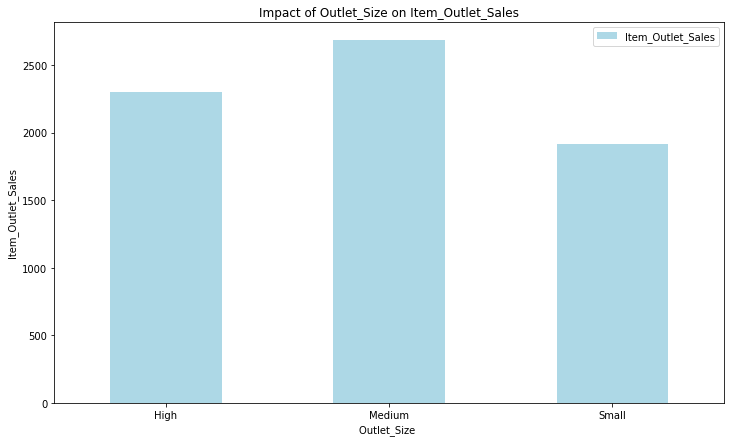

In [30]:
Outlet_Size_pivot = train_data.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales')
Outlet_Size_pivot.plot(kind='bar', color='lightblue',figsize=(12,7))
plt.xlabel('Outlet_Size ')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Size on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

### Impact of Outlet_Type on Item_Outlet_Sales

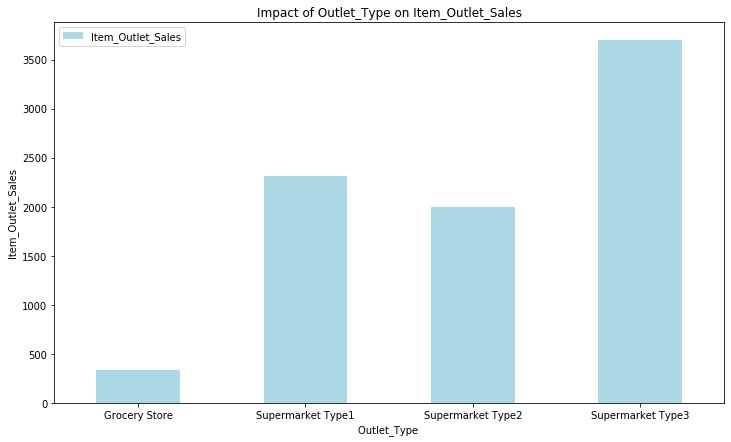

In [31]:
Outlet_Type_pivot = train_data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales")
Outlet_Type_pivot.plot(kind='bar', color='lightblue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

### Impact of Outlet_Location_Type on Item_Outlet_Sales

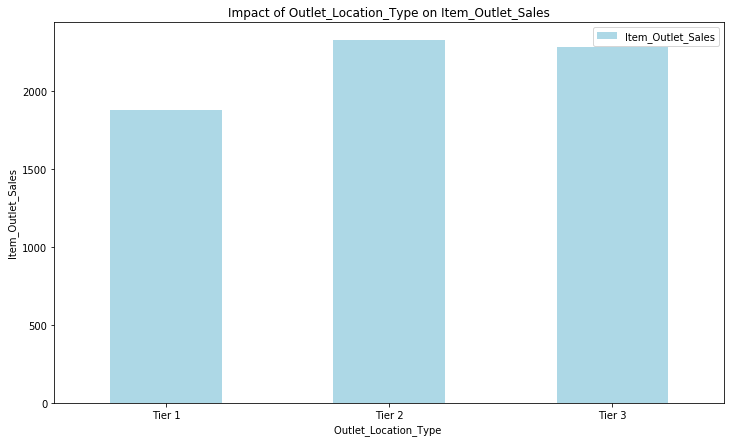

In [32]:
Outlet_Location_Type_pivot = train_data.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales")
Outlet_Location_Type_pivot.plot(kind='bar', color='lightblue',figsize=(12,7))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

## Boxplot for finding Outliers

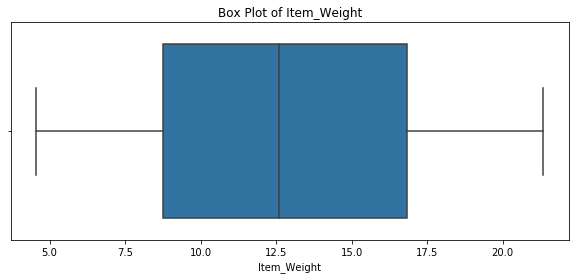

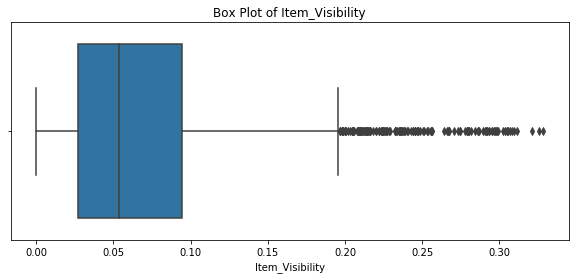

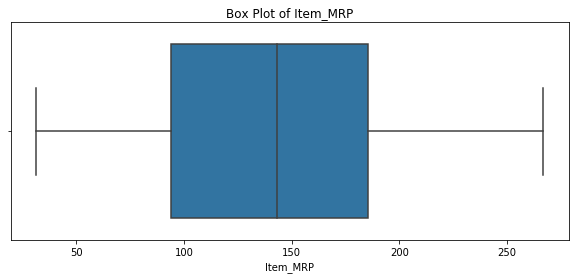

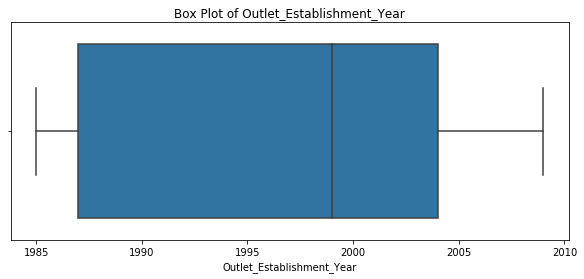

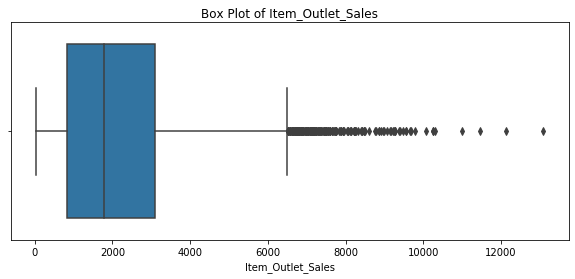

In [33]:
for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot( x=num_variable, data = train_data)
    plt.title(str('Box Plot of ') + str(num_variable))

'Item_Visibility' attribute had many outliers. I will treat this in the next step.

#### Handling Outliers

In [34]:
x = train_data['Item_Visibility']
ul = x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))
ll = x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))
x = x.clip_upper(ul)
x = x.clip_lower(ll)
train_data['Item_Visibility'] = x

## Handling missing value

In [35]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Filling NULL values for attribute 'Item_Weight'

In [37]:
def fill_mean(cols):
    Identifier = cols[0]
    Weight = cols[1]
    
    if pd.isnull(Weight):
        try:
            return Item_Weight_Mean[Item_Weight_Mean.index == Identifier]['Item_Weight'].tolist()[0]
        except:
            return 0
    else:
        return Weight

Item_Weight_Mean = train_data.pivot_table(index='Item_Identifier', values='Item_Weight')
train_data['Item_Weight'] = train_data[['Item_Identifier','Item_Weight']].apply(fill_mean,axis=1)
train_data['Item_Weight'] = train_data['Item_Weight'].dropna()

In [38]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Filling NULL values for attribute 'Outlet_Size'

In [39]:
def fill_mode(cols):
    Size = cols[0]
    Type = cols[1]
    
    if pd.isnull(Size):
        return Outlet_Size_Mode.loc['Outlet_Size'][Outlet_Size_Mode.columns == Type][0]
    else:
        return Size

Outlet_Size_Mode = train_data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
train_data['Outlet_Size'] = train_data[['Outlet_Size','Outlet_Type']].apply(fill_mode,axis=1)

In [40]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Cleaning

#### Handling invalid values for attribute 'Item_Visibility'
Item_Visibility contains value '0', which makes no sense in real world. Let’s consider it as missing value and handle it.

In [41]:
def fill_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return Item_Visibility_Mean[Item_Visibility_Mean.index == item]['Item_Visibility'].tolist()[0]
    else:
        return visibility

Item_Visibility_Mean = train_data.pivot_table(values='Item_Visibility', index='Item_Identifier')
train_data['Item_Visibility'] = train_data[['Item_Visibility','Item_Identifier']].apply(fill_visibility_mean,axis=1)

In [42]:
train_data['Item_Visibility'].describe()

count    8523.000000
mean        0.068784
std         0.046924
min         0.003575
25%         0.031114
50%         0.056922
75%         0.097160
max         0.195979
Name: Item_Visibility, dtype: float64

#### Modify categories of Item_Fat_Content

In [43]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Create a broad category of Item_Type using Item_Identifier

In [44]:
train_data['Item_Type_Combined'] = train_data['Item_Identifier'].apply(lambda x: x[0:2])
train_data['Item_Type_Combined'] = train_data['Item_Type_Combined'].map({'FD':'Food','DR':'Drinks','NC':'Non Consumable'})

In [45]:
train_data['Item_Type_Combined'].value_counts()

Food              6125
Non Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [46]:
train_data.loc[train_data['Item_Type_Combined']=="Non Consumable",'Item_Fat_Content'] = "Non Edible"
train_data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non Edible    1599
Name: Item_Fat_Content, dtype: int64

### Check skewness in the data

In [47]:
train_data.skew()

Item_Weight                  0.063905
Item_Visibility              0.860395
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

Text(0.5, 1.0, 'Distribution of Item_Visibility')

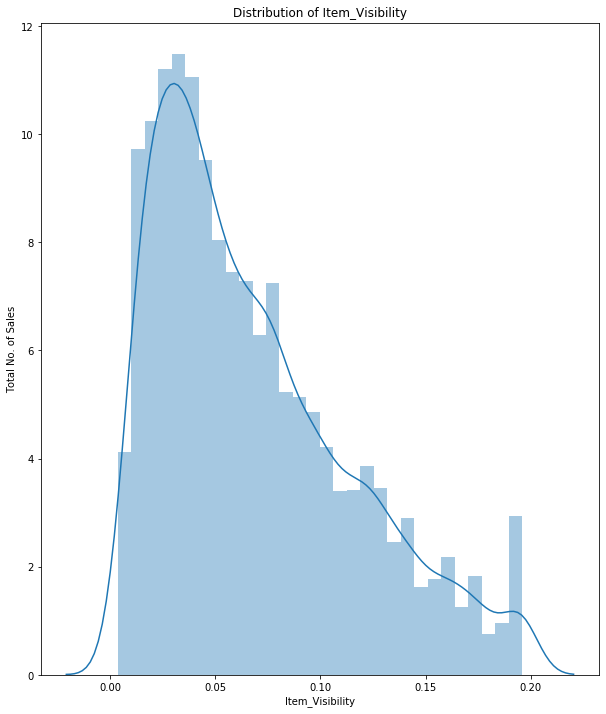

In [48]:
sns.distplot(train_data['Item_Visibility'])
plt.ylabel("Total No. of Sales")
plt.title("Distribution of Item_Visibility")

Is is skewed to the right

Text(0.5, 1.0, 'Distribution of Item_Visibility')

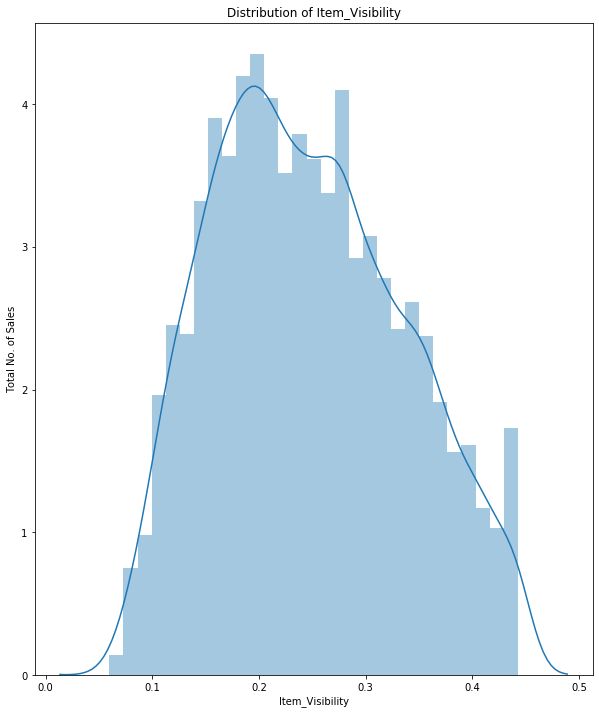

In [49]:
# Making sq-root Transformation
train_data["Item_Visibility"]= np.sqrt(train_data["Item_Visibility"])
sns.distplot(train_data.Item_Visibility)
plt.ylabel("Total No. of Sales")
plt.title("Distribution of Item_Visibility")

## Convert the categorical data into numerical data

In [50]:
train_data = pd.get_dummies(train_data,columns =['Item_Type_Combined','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier'])
train_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non Consumable,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.30,0.126678,Dairy,249.8092,1999,3735.1380,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.138846,Soft Drinks,48.2692,2009,443.4228,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.129461,Meat,141.6180,1999,2097.2700,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.123587,Fruits and Vegetables,182.0950,1998,732.3800,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.089901,Household,53.8614,1987,994.7052,0,0,1,...,0,1,0,0,0,0,0,0,0,0


### Drop the columns which have been converted into new columns

In [51]:
train_data.drop(['Item_Type','Item_Identifier'],axis=1,inplace=True)

In [52]:
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Non Edible,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0.126678,249.8092,1999,3735.1380,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.138846,48.2692,2009,443.4228,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.129461,141.6180,1999,2097.2700,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.123587,182.0950,1998,732.3800,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.089901,53.8614,1987,994.7052,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0


## Normalize the data

I tested the data using Standard Scaler, Min-Max Scaler and Robust Scaler. All the techniques gave the same RMSE and R2. So I will be using Min-Max Scaler here.

In [53]:
mmsc = MinMaxScaler()
mmsc_data = mmsc.fit_transform(train_data)
mmsc_data = pd.DataFrame(mmsc_data)
mmsc_data.columns = train_data.columns
train_data=mmsc_data
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Non Edible,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0.435597,0.174688,0.927507,0.583333,0.283587,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.277283,0.206466,0.072068,1.000000,0.031419,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.819672,0.181956,0.468288,0.583333,0.158115,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.899297,0.166615,0.640093,0.541667,0.053555,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.418267,0.078641,0.095805,0.083333,0.073651,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Fit linear regression model and compute RMSE and R-Square

In [54]:
X = train_data.drop('Item_Outlet_Sales',axis=1)
Y = train_data['Item_Outlet_Sales']

In [55]:
# SPLITTING DATASET
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=247)

In [56]:
# Model Initialization
reg = LinearRegression(normalize=True)
# Data Fitting
reg = reg.fit(x_train,y_train)
# Predicting the values of Y
y_pred = reg.predict(x_test)

In [57]:
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('\033[1m'+"RMSE =",round(rmse,2))

RMSE = 0.08


In [58]:
# Compute R2
r2 = r2_score(y_test,y_pred)
print('\033[1m'+"R2 =",round(r2*100,2),'%')

R2 = 60.1 %


In [59]:
predictors = x_train.columns
coef = pd.Series(reg.coef_,predictors).sort_values()

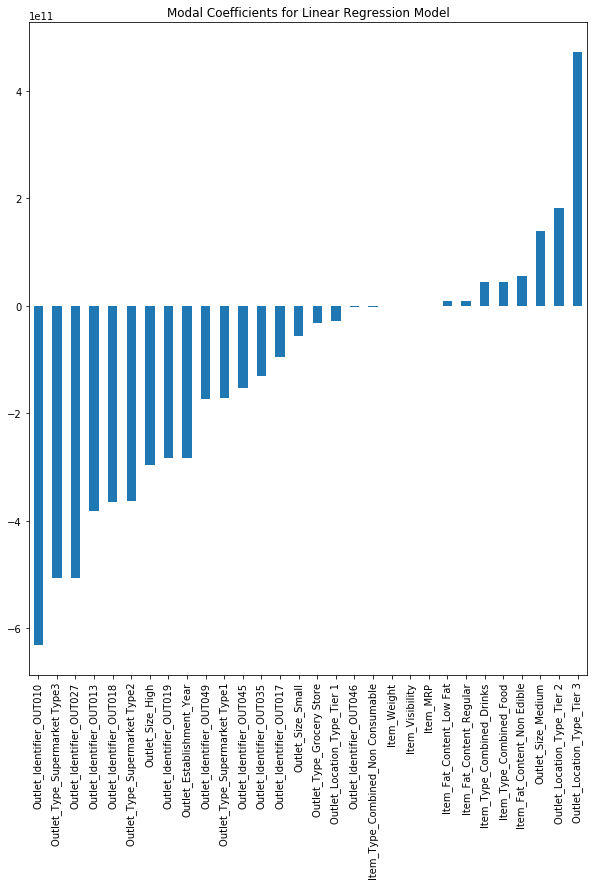

In [60]:
coef.plot(kind='bar',title='Modal Coefficients for Linear Regression Model')

## Applying regularization techniques on the data to check whether they are better than the basic linear model

#### Function for Ridge Regression - L2 Regularization

In [61]:
def ridge_func(i):
    ridgeReg = Ridge(alpha=i,normalize=True)
    ridgeReg.fit(x_train,y_train)
    Y_pred = ridgeReg.predict(x_test)
    rmse = round(np.sqrt(mean_squared_error(y_test,Y_pred)),2)
    r2 = round(r2_score(y_test,Y_pred)*100,2)
    print('\033[1m'+'The Ridge RMSE =',rmse,'and Ridge R2 =',r2,'%')
    residual_plot(Y_pred,y_test,"Ridge",i)

#### Function for Lasso Regression - L1 Regularization

In [62]:
def lasso_func(i):
    lassoReg = Lasso(alpha=i,normalize=True)
    lassoReg.fit(x_train,y_train)
    Y_pred = lassoReg.predict(x_test)
    rmse = round(np.sqrt(mean_squared_error(y_test,Y_pred)),2)
    r2 = round(r2_score(y_test,Y_pred)*100,2)
    print('\033[1m'+'The Lasso RMSE =',rmse,'and Lasso R2 =',r2,'%')
    residual_plot(Y_pred,y_test,"Lasso",i)

#### Function for Residual Plot

In [63]:
def residual_plot(Y_pred,y_test,name,i):
    x = [i for i in range(1,len(Y_pred)+1)]
    x_plot = plt.scatter(x,(Y_pred-y_test), c='lightblue')
    plt.plot(x,[0]*len(Y_pred), c='r')
    plt.title('Residual Plot for '+name+' with alpha = '+str(i))
    plt.show()

#### Applying Ridge and Lasso using different alpha parameters. Also plotting residual plot for each.

For alpha = 0.01
The Ridge RMSE = 0.08 and Ridge R2 = 60.05 %


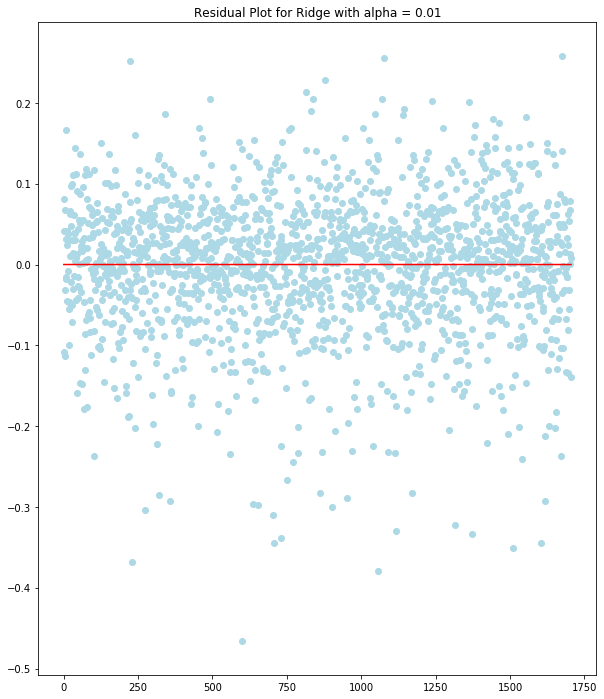

The Lasso RMSE = 0.13 and Lasso R2 = -0.04 %


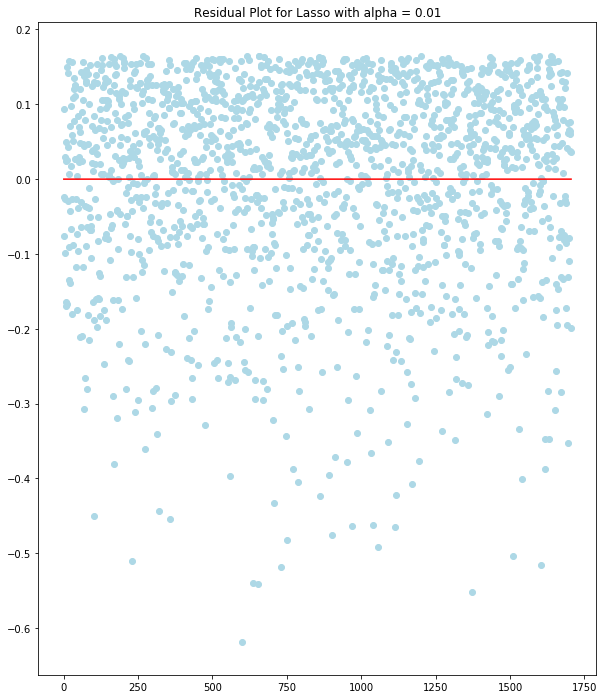

For alpha = 0.05
The Ridge RMSE = 0.08 and Ridge R2 = 59.77 %


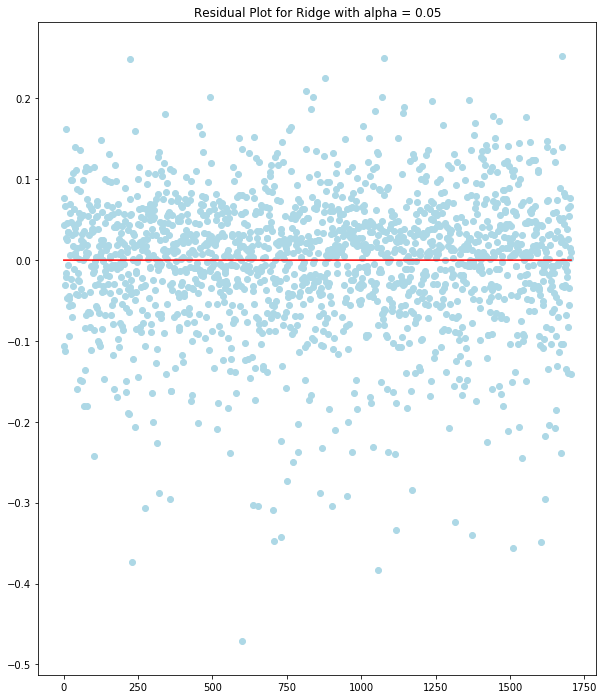

The Lasso RMSE = 0.13 and Lasso R2 = -0.04 %


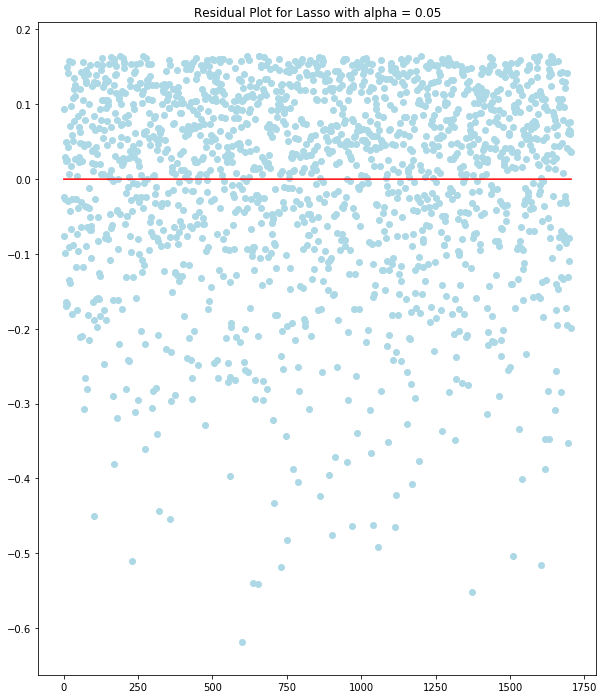

For alpha = 0.5
The Ridge RMSE = 0.09 and Ridge R2 = 54.27 %


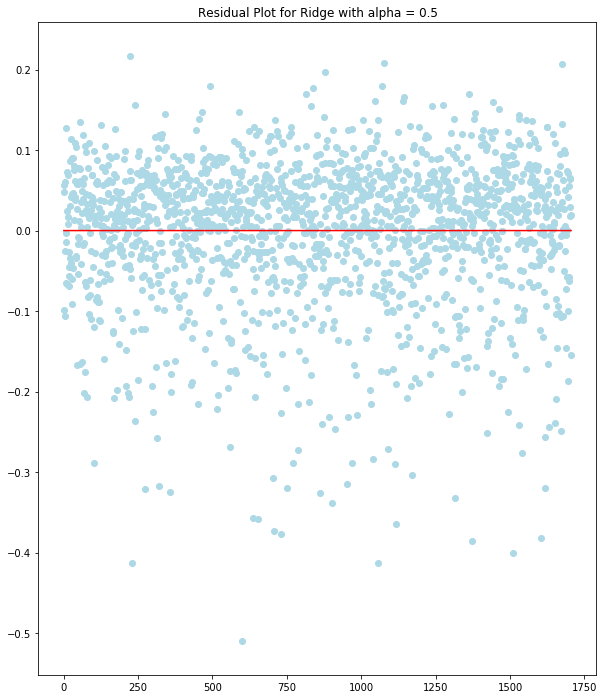

The Lasso RMSE = 0.13 and Lasso R2 = -0.04 %


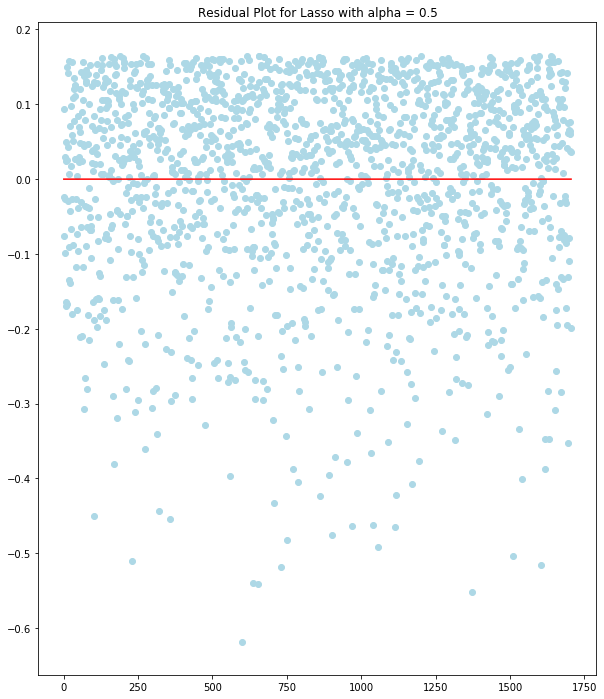

For alpha = 5
The Ridge RMSE = 0.12 and Ridge R2 = 24.06 %


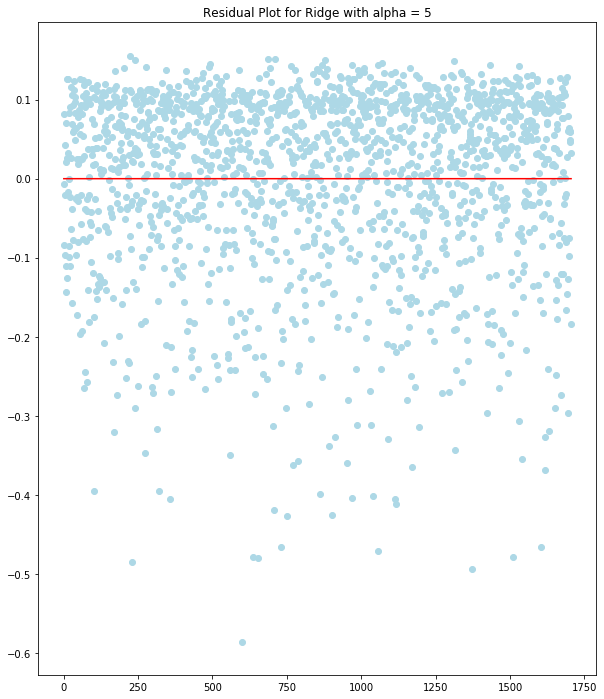

The Lasso RMSE = 0.13 and Lasso R2 = -0.04 %


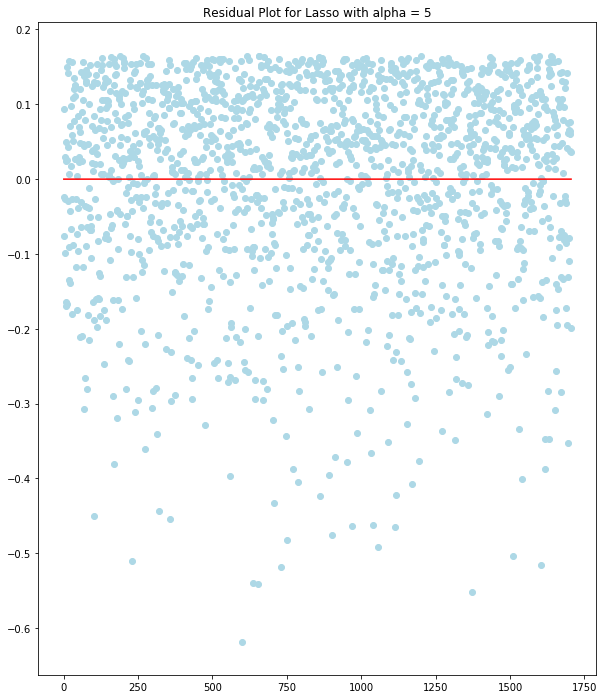

In [64]:
alpha_range = [0.01,0.05,0.5,5]
for i in alpha_range:
    print('\033[1m'+'For alpha =',i)
    ridge_func(i)
    lasso_func(i)

#### The score is about the same (negligible impact) after applying regularization techniques on the data . I have analysed various regularization parameters.

## Best RMSE and R2 :
- <b> RMSE = 0.08 and R2 = 60.32 %